In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import joblib



In [2]:
data = pd.read_csv('laptop_data_cleaned.csv')

print(data.shape)

print(data.head())


(1273, 13)
  Company   TypeName  Ram  Weight      Price  TouchScreen  Ips         Ppi  \
0   Apple  Ultrabook    8    1.37  11.175755            0    1  226.983005   
1   Apple  Ultrabook    8    1.34  10.776777            0    0  127.677940   
2      HP   Notebook    8    1.86  10.329931            0    0  141.211998   
3   Apple  Ultrabook   16    1.83  11.814476            0    1  220.534624   
4   Apple  Ultrabook    8    1.37  11.473101            0    1  226.983005   

       Cpu_brand  HDD  SSD Gpu_brand      Os  
0  Intel Core i5    0  128     Intel     Mac  
1  Intel Core i5    0    0     Intel     Mac  
2  Intel Core i5    0  256     Intel  Others  
3  Intel Core i7    0  512       AMD     Mac  
4  Intel Core i5    0  256     Intel     Mac  


In [3]:
x = data.drop('Price', axis=1)
y = np.log1p(data['Price'])

categorical_featchers = ['Company','TypeName','Cpu_brand','Gpu_brand','Os']
numerical_featchers = ['Ram','Weight','TouchScreen','Ips','Ppi','HDD','SSD']

print("categorical_featchers:", categorical_featchers)
print("numerical_featchers:", numerical_featchers)

categorical_featchers: ['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os']
numerical_featchers: ['Ram', 'Weight', 'TouchScreen', 'Ips', 'Ppi', 'HDD', 'SSD']


In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (1018, 12)
x_test shape: (255, 12)


In [5]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_featchers),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_featchers)
    ]
)

data.shape
data.head(2)

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac


In [6]:

from sklearn.linear_model import LinearRegression


lr_pipiline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', LinearRegression())])

lr_pipiline.fit(x_train, y_train)

y_pred_lr = lr_pipiline.predict(x_test)

r2_lr = r2_score(y_test, y_pred_lr) # accuracy
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print(f"Linear Regression R2 Score: {r2_lr:.4f}")
print(f"Linear Regression MSE: {mse_lr:.4f}")
print(f"Linear Regression RMSE: {rmse_lr:.4f}")





Linear Regression R2 Score: 0.8084
Linear Regression MSE: 0.0006
Linear Regression RMSE: 0.0235


In [7]:
from sklearn.tree import DecisionTreeRegressor

dr_pipiline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', DecisionTreeRegressor(random_state=42))])

dr_pipiline.fit(x_train, y_train)
y_pred_dr = dr_pipiline.predict(x_test)

r2_dr = r2_score(y_test, y_pred_dr) # accuracy

mse_dr = mean_squared_error(y_test, y_pred_dr)
rmse_dr = np.sqrt(mse_dr) 

print(f"Decision Tree R2 Score: {r2_dr:.4f}")
print(f"Decision Tree RMSE: {rmse_dr:.4f}")
print(f"Decision Tree MSE: {mse_dr:.4f}")

Decision Tree R2 Score: 0.8388
Decision Tree RMSE: 0.0215
Decision Tree MSE: 0.0005


In [8]:
from sklearn.ensemble import RandomForestRegressor

rf_pipiline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1))])

rf_pipiline.fit(x_train, y_train)
y_pred_rf = rf_pipiline.predict(x_test)

r2_rf = r2_score(y_test, y_pred_rf) # accuracy

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)


print(f"Random Forest R2 Score: {r2_rf:.4f}")
print(f"Random Forest RMSE: {rmse_rf:.4f}")
print(f"Random Forest MSE: {mse_rf:.4f}")

Random Forest R2 Score: 0.8911
Random Forest RMSE: 0.0177
Random Forest MSE: 0.0003


In [9]:
model_perfomance = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'R2 Score': [r2_lr, r2_dr, r2_rf],
    'MSE': [mse_lr, mse_dr, mse_rf],
    })

print("Model Performance Summary:")
print(model_perfomance)

Model Performance Summary:
               Model  R2 Score       MSE
0  Linear Regression  0.808419  0.000551
1      Decision Tree  0.838832  0.000464
2      Random Forest  0.891108  0.000313


In [10]:
best_model = rf_pipiline

filename = 'laptop_price_model.joblib'
joblib.dump(best_model, filename)

print(f"Best model saved as {filename}")


Best model saved as laptop_price_model.joblib


In [11]:
loaded_model = joblib.load('laptop_price_model.joblib')
print("Model loaded successfully.")

sample_laptop = pd.DataFrame([{
   'Company': 'Apple',
    'TypeName': 'Ultrabook',
    'Ram': 16,
    'Weight': 1.37,
    'TouchScreen': 0,
    'Ips': 1,
    'Ppi': 226.98,
    'Cpu_brand': 'Intel Core i5',
    'HDD': 0,
    'SSD': 512,
    'Gpu_brand': 'Intel',
    'Os': 'Mac'
}])

print("\n Prediction for sample laptop:")
print(sample_laptop)

predicted_log_price = loaded_model.predict(sample_laptop)
predicted_price = np.exp(predicted_log_price)

print(f"Predicted Price: ${predicted_price[0]:.2f}")

Model loaded successfully.

 Prediction for sample laptop:
  Company   TypeName  Ram  Weight  TouchScreen  Ips     Ppi      Cpu_brand  \
0   Apple  Ultrabook   16    1.37            0    1  226.98  Intel Core i5   

   HDD  SSD Gpu_brand   Os  
0    0  512     Intel  Mac  
Predicted Price: $12.72


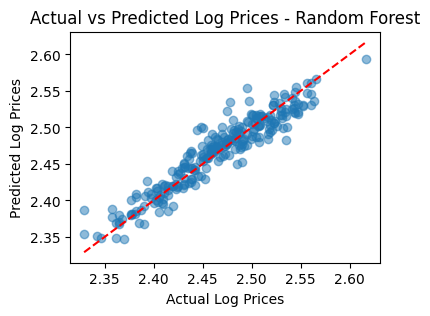

In [12]:
plt.figure(figsize=(4,3))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Log Prices')
plt.ylabel('Predicted Log Prices')
plt.title('Actual vs Predicted Log Prices - Random Forest')
plt.show()